<p align="center"><img alt="udeA logo" height="150px" src="https://github.com/freddyduitama/images/blob/master/logo.png?raw=true"></p><h1><font color='0B5345'> <center>

 </center></font></h1>
<h2><font color='0B5345'> <center>
Bioseñales y Sistemas</center></font></h2>
<font  face="Courier New" size="3">

 </center></font></h1>
<h2><font color='0B5345'> <center>
Proyecto 1: Análisis estadístico </center></font></h2>
<font  face="Courier New" size="2">

 </center></font></h1>
<h2><font color='0B5345'> <center>
Isabella Vásquez García </center></font></h2>
<font  face="Courier New" size="1">

 </center></font></h1>
<h2><font color='0B5345'> <center>
C.C. 1000.438.341 </center></font></h2>
<font  face="Courier New" size="1">

 </center></font></h1>
<h2><font color='0B5345'> <center>
Marie Anne Johanna Bernal Diaz </center></font></h2>
<font  face="Courier New" size="1">

 </center></font></h1>
<h2><font color='0B5345'> <center>
C.C. 1003.894.043 </center></font></h2>
<font  face="Courier New" size="1">

<p3><center><b><font color='0B5345' face="Lucida Calligraphy,Comic Sans MS,Lucida Console" size="5">Universidad de Antioquia - Bioingeniería</font></b> </center></p3>

In [ ]:
!pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 4.5 MB/s eta 0:00:00


In [ ]:
!pip install antropy


  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.1/48.1 kB 2.1 MB/s eta 0:00:00
  Created wheel for antropy: filename=antropy-0.1.6-py3-none-any.whl size=16879 sha256=2a7b8009b0880521d60922cdaa913dc4e0796a6d2cb0da420cd9d19f37c13272
  Stored in directory: /root/.cache/pip/wheels/98/22/06/e91d7bb213c7133d5e2eb34258623e1e19928d5f05e1ee6812
Successfully built antropy


In [ ]:
from google.colab import files
import zipfile
import os
import pandas as pd
import numpy as np
import glob
import scipy.signal as signal
from scipy.fftpack import fft;
import matplotlib.pyplot as plt;
import scipy.io as sio;
import seaborn as sns
from scipy.signal import detrend
from scipy.stats import ttest_ind, shapiro, levene, mannwhitneyu
from scipy import stats
import antropy as ant

# **Contexto:**


Para conocer el contexto ingresar al siguiente link:

[Contexto_Proyecto_1_Marie_Isabella](https://https://docs.google.com/document/d/1w7hDZFVTSOR3GEQOQ4khYnIHwZrOXG-s/edit?usp=sharing&ouid=111137400881704293339&rtpof=true&sd=true)

# **Organización de la Base de datos**

Para la organización de datos, inicialmente se separaron los archivos por carpetas según la extensión del archivo (por ejemplo .ts) y se organizaron otros archivos. Lo anterior, se cargó al espacio de Colab como se muestra en el siguiente código y los datos se tomaron de la caperte Arvhivos_TS

In [ ]:
cargar_carpeta = files.upload() # Inicialmente cargamos la carpeta comprimida a Drive
# Se crea un ciclo for con el fin de que se recorran los archivos de la carpeta
for filename in cargar_carpeta.keys():
  with zipfile.ZipFile(filename, 'r') as zip_ref:
            zip_ref.extractall('/content/')



Saving gait-in-neurodegenerative-disease-database-1.0.0.zip to gait-in-neurodegenerative-disease-database-1.0.0.zip


# **Extracción de las señales**

La función obtener_datos me permite extraer un conjunto de archivos de la carpeta Archivos_TS indicándol la ruta de ese carpeta, las columnas que tendrá el dataFrame, la identificación del archivo (por ejemplo "als") y la cantidad de archivos.

Esta función me permite extraer en un Data Frame con las primeras 5 columnas, luego convertir ese Data Frame a ndarray y seprar por las columnas solicitadas

In [ ]:
columnas = ['Elapsed Time (sec)', 'Left Stride Interval (sec)', 'Right Stride Interval (sec)', 'Left Swing Interval (sec)',
'Right Swing Interval (sec)',	'Left Swing Interval (% of stride)', 'Right Swing Interval (% of stride)', 'Left Stance Interval (sec)', 'Right Stance Interval (sec)', 'Left Stance Interval (% of stride)',
'Right Stance Interval (% of stride)', 'Double Support Interval (sec)',	'Double Support Interval (% of stride)']

ruta_carpeta_Archivos_TS = '/content/gait-in-neurodegenerative-disease-database-1.0.0/Archivos_TS'
archivos_TS = os.listdir(ruta_carpeta_Archivos_TS)

def obtener_datos(ruta_carpeta, nombre_archivo, columnas):
  ruta = os.path.join(ruta_carpeta, nombre_archivo)
  try:
    data_frame = pd.read_csv(ruta, delimiter='\t', names=columnas)
    data_frame = data_frame.iloc[:,:5]
    ndarray = data_frame.to_numpy()
    tiempo = ndarray[:,0]
    Left_Stride_Interval=ndarray[:,1]
    Right_Stride_Interval=ndarray[:,2]
    Left_Swing_Interval=ndarray[:,3]
    Right_Swing_Interval=ndarray[:,4]
  except FileNotFoundError:
    print(f'El archivo {archivo} no se encontró en {ruta_carpeta}.')
  return tiempo , Right_Swing_Interval , Left_Swing_Interval , Right_Stride_Interval , Left_Stride_Interval


# **Funciones a utilizar**

### **Filtro Hampel**

In [ ]:
def hampelfilter(wk, K, FilterParms):
    """
    Procedure to implement the Hampel filter
    """
    #
    Thresh = FilterParms[0]
    ctr = wk#[K]
    ref = np.median(wk)

    AbsDev = abs(wk - ref)
    MAD = 1.4826 * np.median(AbsDev)
    TestVal = abs(ctr - ref)
    #if TestVal > Thresh * MAD:
    yk = ctr

    print("changing");
    numero = np.sum((TestVal > Thresh * MAD)==True)
    print(numero)

    yk[TestVal > Thresh * MAD] = ref


    return yk

**Ejemplo del funcionamiento del filtro y de la función dtrend**

In [ ]:
tiempo_ALS, Right_Swing_Interval_ALS, Left_Swing_Interval_ALS, Right_Stride_Interval_ALS, Left_Stride_Interval_ALS = obtener_datos(ruta_carpeta_Archivos_TS, 'als8.ts' ,columnas)

changing
0


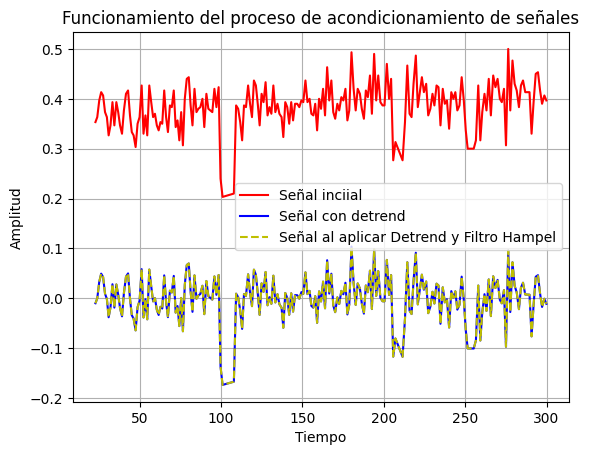

In [ ]:
Right_Swing_Interval_ALS_dt = signal.detrend(Right_Swing_Interval_ALS)
Right_Swing_Interval_ALS_dt_filtrada = hampelfilter(Right_Swing_Interval_ALS_dt, 3, [6])
plt.figure()
plt.plot(tiempo_ALS, Right_Swing_Interval_ALS, label='Señal inciial', color='r')
plt.plot(tiempo_ALS, Right_Swing_Interval_ALS_dt, label='Señal con detrend', color='b')
plt.plot(tiempo_ALS, Right_Swing_Interval_ALS_dt_filtrada, label='Señal al aplicar Detrend y Filtro Hampel', color='y', linestyle='--')
plt.title('Funcionamiento del proceso de acondicionamiento de señales')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()

### **Entropía de permutaciones**

La siguiente función me permite calcular la entropia de permutaciones de cada señal de marcha. Es importante aclara que para calular esta métrica se utilizó la librería "antropy" [1], la cual, según lo mencionado en la documentación de la librería se puede utilizar para e puede utilizar para extraer características de señales de EEG, por lo que decidimos utilizarla por esta razón

[1]: https://raphaelvallat.com/antropy/build/html/index.html

In [ ]:
def entropy(señal_marcha_filtrada):
  entropia = ant.perm_entropy(señal_marcha_filtrada, normalize=True)
  return entropia

### **Desviación estándar y coeficiente de varianza**

Según el artículo "Dynamic markers of altered gait rhythm in amyotrophic lateral sclerosis" [2] la CV se calcula como:

**CV = (SD/median) * 100**

Por lo que se generó una función capaz de calcular la Desviación estándar (SD) y el coeficiente de varianza de cada señal de marcha

[2]:	J. M. Hausdorff, A. Lertratanakul, M. E. Cudkowicz, A. L. Peterson, D. Kaliton, and A. L. Goldberger, “Dynamic markers of altered gait rhythm in amyotrophic lateral sclerosis,” J Appl Physiol, vol. 88, no. 6, pp. 2045–2053, 2000, doi: 10.1152/JAPPL.2000.88.6.2045/ASSET/IMAGES/LARGE/JAPP05634002X.JPEG.


In [ ]:
def calcular_cv_sd(senal):
    media = np.mean(senal)
    sd = senal.std()
    cv = (sd / media) * 100
    return sd, cv

### **Función filtrado y datos atípicos**

Estas dos funciones me permite aplicar a cada señal de marcha, el filtro hampel, el detrend y hallar la SD, CV y entropía de cada señal

In [ ]:
# Fución para el acondicionamiento de las señales de marcha
def filtrado_datos_atipicos(señal_marcha):
  señal_marcha_dt = signal.detrend(señal_marcha)
  señal_marcha_dt_hamper = hampelfilter(señal_marcha_dt, 3, [6])
  return señal_marcha_dt_hamper

In [ ]:
def metricas(señal_filtrada):
  SD = calcular_cv_sd(señal_filtrada)[1]
  CV = calcular_cv_sd(señal_filtrada)[0]
  entropia = entropy(señal_filtrada)
  return CV, SD, entropia

# **Aplicación de las funciones para obtener el Data Frame solcitado**

Cada una de las señalas expuestas anteriormente se utilizaron en el siguiente código con el acondicionar las señales de marcha y aplicarles las métricas y generar un Data Frame con esta información

In [ ]:
# Se crean listas vacías para almacenar los resultados
Resultados_ALS = []
Resultados_Park = []
Resultados_Hunt = []
Resultados_Control = []
lista_ALS = []
lista_Park = []
lista_Hunt = []
lista_Control = []

# Ciclo for que me recorre los archivos contenidos en la carpeta Archivos:TS
for archivo in archivos_TS:
# Debido a la cantidad de archivos y sus diferentes nombres, se generan condicionales para separa los sujetos por condición
    if archivo.startswith('als'):
        lista_ALS.append(archivo)

        # Aplicando la función obtener datos para extraer la información de un archivo
        tiempo_ALS, Right_Swing_Interval_ALS, Left_Swing_Interval_ALS, Right_Stride_Interval_ALS, Left_Stride_Interval_ALS = obtener_datos(ruta_carpeta_Archivos_TS, archivo, columnas)
        # Acondicionando las señales de marcha de cada archivo
        L_STR_I_acondicionada = filtrado_datos_atipicos(Left_Stride_Interval_ALS)
        R_STR_I_acondicionada = filtrado_datos_atipicos(Right_Stride_Interval_ALS)
        L_SWG_I_acondicionada = filtrado_datos_atipicos(Left_Swing_Interval_ALS)
        R_SWG_I_acondicionada = filtrado_datos_atipicos(Right_Swing_Interval_ALS)
        # Caculando las métricas para cada señal de marcha
        sd_L_STR, cv_L_STR, entropia_L_STR = metricas(L_STR_I_acondicionada)
        sd_R_STR, cv_R_STR, entropia_R_STR = metricas(R_STR_I_acondicionada)
        sd_L_SWG, cv_L_SWG, entropia_L_SWG = metricas(L_SWG_I_acondicionada)
        sd_R_SWG, cv_R_SWG, entropia_R_SWG = metricas(R_SWG_I_acondicionada)
        # Creando un directorio para guardar la información generada anteriomente
        Resultados_ALS.append({
            'Sujeto': archivo,
            'Condición': "als",
            'CV_Left_Stride': cv_L_STR,
            'SD_Left_Stride': sd_L_STR,
            'Entropía_Left_Stride': entropia_L_STR,
            'CV_Right_Stride': cv_R_STR,
            'SD_Right_Stride': sd_R_STR,
            'Entropía_Right_Stride': entropia_R_STR,
            'CV_Left_Swing': cv_L_SWG,
            'SD_Left_Swing': sd_L_SWG,
            'Entropía_Left_Swing': entropia_L_SWG,
            'CV_Right_Swing': cv_R_SWG,
            'SD_Right_Swing': sd_R_SWG,
            'Entropía_Right_Swing': entropia_R_SWG
        })

    elif archivo.startswith("park"):
      lista_Park.append(archivo)
      tiempo_Park, Right_Swing_Interval_Park, Left_Swing_Interval_Park, Right_Stride_Interval_Park, Left_Stride_Interval_Park = obtener_datos(ruta_carpeta_Archivos_TS, archivo, columnas)

      L_STR_I_acondicionada = filtrado_datos_atipicos(Left_Stride_Interval_Park)
      R_STR_I_acondicionada = filtrado_datos_atipicos(Right_Stride_Interval_Park)
      L_SWG_I_acondicionada = filtrado_datos_atipicos(Left_Swing_Interval_Park)
      R_SWG_I_acondicionada = filtrado_datos_atipicos(Right_Swing_Interval_Park)

      sd_L_STR, cv_L_STR, entropia_L_STR = metricas(L_STR_I_acondicionada)
      sd_R_STR, cv_R_STR, entropia_R_STR = metricas(R_STR_I_acondicionada)
      sd_L_SWG, cv_L_SWG, entropia_L_SWG = metricas(L_SWG_I_acondicionada)
      sd_R_SWG, cv_R_SWG, entropia_R_SWG = metricas(R_SWG_I_acondicionada)

      Resultados_Park.append({
            'Sujeto': archivo,
            'Condición': "park",
            'CV_Left_Stride': cv_L_STR,
            'SD_Left_Stride': sd_L_STR,
            'Entropía_Left_Stride': entropia_L_STR,
            'CV_Right_Stride': cv_R_STR,
            'SD_Right_Stride': sd_R_STR,
            'Entropía_Right_Stride': entropia_R_STR,
            'CV_Left_Swing': cv_L_SWG,
            'SD_Left_Swing': sd_L_SWG,
            'Entropía_Left_Swing': entropia_L_SWG,
            'CV_Right_Swing': cv_R_SWG,
            'SD_Right_Swing': sd_R_SWG,
            'Entropía_Right_Swing': entropia_R_SWG
        })

    elif archivo.startswith("hunt"):
      lista_Hunt.append(archivo)

      tiempo_Hunt, Right_Swing_Interval_Hunt, Left_Swing_Interval_Hunt, Right_Stride_Interval_Hunt, Left_Stride_Interval_Hunt = obtener_datos(ruta_carpeta_Archivos_TS, archivo, columnas)

      L_STR_I_acondicionada = filtrado_datos_atipicos(Left_Stride_Interval_Hunt)
      R_STR_I_acondicionada = filtrado_datos_atipicos(Right_Stride_Interval_Hunt)
      L_SWG_I_acondicionada = filtrado_datos_atipicos(Left_Swing_Interval_Hunt)
      R_SWG_I_acondicionada = filtrado_datos_atipicos(Right_Swing_Interval_Hunt)

      sd_L_STR, cv_L_STR, entropia_L_STR = metricas(L_STR_I_acondicionada)
      sd_R_STR, cv_R_STR, entropia_R_STR = metricas(R_STR_I_acondicionada)
      sd_L_SWG, cv_L_SWG, entropia_L_SWG = metricas(L_SWG_I_acondicionada)
      sd_R_SWG, cv_R_SWG, entropia_R_SWG = metricas(R_SWG_I_acondicionada)

      Resultados_Hunt.append({
            'Sujeto': archivo,
            'Condición': "hunt",
            'CV_Left_Stride': cv_L_STR,
            'SD_Left_Stride': sd_L_STR,
            'Entropía_Left_Stride': entropia_L_STR,
            'CV_Right_Stride': cv_R_STR,
            'SD_Right_Stride': sd_R_STR,
            'Entropía_Right_Stride': entropia_R_STR,
            'CV_Left_Swing': cv_L_SWG,
            'SD_Left_Swing': sd_L_SWG,
            'Entropía_Left_Swing': entropia_L_SWG,
            'CV_Right_Swing': cv_R_SWG,
            'SD_Right_Swing': sd_R_SWG,
            'Entropía_Right_Swing': entropia_R_SWG
        })

    elif archivo.startswith("control"):
      lista_Control.append(archivo)

      tiempo_Control, Right_Swing_Interval_Control, Left_Swing_Interval_Control, Right_Stride_Interval_Control, Left_Stride_Interval_Control = obtener_datos(ruta_carpeta_Archivos_TS, archivo, columnas)

      L_STR_I_acondicionada = filtrado_datos_atipicos(Left_Stride_Interval_Control)
      R_STR_I_acondicionada = filtrado_datos_atipicos(Right_Stride_Interval_Control)
      L_SWG_I_acondicionada = filtrado_datos_atipicos(Left_Swing_Interval_Control)
      R_SWG_I_acondicionada = filtrado_datos_atipicos(Right_Swing_Interval_Control)

      sd_L_STR, cv_L_STR, entropia_L_STR = metricas(L_STR_I_acondicionada)
      sd_R_STR, cv_R_STR, entropia_R_STR = metricas(R_STR_I_acondicionada)
      sd_L_SWG, cv_L_SWG, entropia_L_SWG = metricas(L_SWG_I_acondicionada)
      sd_R_SWG, cv_R_SWG, entropia_R_SWG = metricas(R_SWG_I_acondicionada)

      Resultados_Control.append({
            'Sujeto': archivo,
            'Condición': "control",
            'CV_Left_Stride': cv_L_STR,
            'SD_Left_Stride': sd_L_STR,
            'Entropía_Left_Stride': entropia_L_STR,
            'CV_Right_Stride': cv_R_STR,
            'SD_Right_Stride': sd_R_STR,
            'Entropía_Right_Stride': entropia_R_STR,
            'CV_Left_Swing': cv_L_SWG,
            'SD_Left_Swing': sd_L_SWG,
            'Entropía_Left_Swing': entropia_L_SWG,
            'CV_Right_Swing': cv_R_SWG,
            'SD_Right_Swing': sd_R_SWG,
            'Entropía_Right_Swing': entropia_R_SWG
        })


changing
4
changing
5
changing
1
changing
0
changing
4
changing
6
changing
1
changing
4
changing
1
changing
2
changing
0
changing
2
changing
1
changing
2
changing
0
changing
1
changing
0
changing
3
changing
0
changing
1
changing
5
changing
5
changing
1
changing
1
changing
0
changing
1
changing
0
changing
2
changing
3
changing
3
changing
0
changing
1
changing
2
changing
2
changing
1
changing
2
changing
3
changing
3
changing
1
changing
1
changing
0
changing
0
changing
0
changing
0
changing
1
changing
0
changing
1
changing
0
changing
7
changing
6
changing
2
changing
4
changing
2
changing
0
changing
1
changing
4
changing
3
changing
2
changing
3
changing
5
changing
4
changing
4
changing
4
changing
4
changing
7
changing
9
changing
3
changing
3
changing
4
changing
4
changing
4
changing
3
changing
5
changing
4
changing
5
changing
3
changing
8
changing
9
changing
6
changing
5
changing
6
changing
11
changing
5
changing
5
changing
4
changing
2
changing
5
changing
3
changing
0
changing
0
changing


In [ ]:
# Creando un DF por cada grupo
df_ALS = pd.DataFrame(Resultados_ALS)
df_Park = pd.DataFrame(Resultados_Park)
df_Hunt = pd.DataFrame(Resultados_Hunt)
df_Control= pd.DataFrame(Resultados_Control)
# Crenaod el DF final concatenando los DF de cada grupo
df_datos = pd.concat([df_ALS,df_Park,df_Hunt,df_Control], ignore_index=True)
df_datos

,Sujeto,Condición,CV_Left_Stride,SD_Left_Stride,Entropía_Left_Stride,CV_Right_Stride,SD_Right_Stride,Entropía_Right_Stride,CV_Left_Swing,SD_Left_Swing,Entropía_Left_Swing,CV_Right_Swing,SD_Right_Swing,Entropía_Right_Swing
0,als10.ts,als,-4.302212e+03,0.032201,0.998390,-1.955621e+03,0.028613,0.997018,5.329325e+16,0.013228,0.991964,-4.019442e+03,0.017318,0.996210
1,als9.ts,als,-5.956029e+16,0.054896,0.995086,-3.269234e+02,0.049520,0.984088,1.388868e+16,0.021566,0.995532,-1.883585e+03,0.026039,0.987501
2,als4.ts,als,-1.092359e+02,0.474524,0.994652,-1.004160e+02,0.428862,0.997063,-7.721391e+16,0.073025,0.995067,-2.156261e+03,0.073787,0.992663
3,als12.ts,als,-9.770600e+01,0.817655,0.911541,-9.988199e+01,0.877180,0.937151,-1.457921e+02,0.275175,0.985263,-1.472667e+02,0.327699,0.977030
4,als8.ts,als,-9.227352e+02,0.053629,0.997111,-5.933382e+02,0.040709,0.976824,-1.118121e+03,0.027473,0.991447,3.462020e+03,0.019341,0.990603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,control12.ts,control,-5.179535e+02,0.036138,0.996160,-1.355568e+03,0.034448,0.996594,4.727240e+03,0.018700,0.995950,1.050398e+03,0.014924,0.990874
60,control15.ts,control,-5.382271e+02,0.040723,0.981891,-6.956940e+02,0.043649,0.991678,-4.971270e+02,0.017431,0.994029,-8.570452e+02,0.016882,0.990081
61,control9.ts,control,-8.561444e+02,0.027995,0.997533,-1.073656e+03,0.030281,0.996534,3.309622e+16,0.016635,0.994296,-2.897281e+03,0.015089,0.994000
62,control6.ts,control,1.284964e+16,0.029324,0.987311,8.786724e+15,0.029446,0.988317,1.529363e+16,0.014181,0.996527,1.037296e+16,0.014801,0.995145


# **Análisis estadístico de los datos**

Con los datos ya organizados en el data frame general, se procede a realizar un análisis exploratorio de los datos a través de gráficos de dispersión y de cajas y bigotes para reconocer la dispersión de los datos

## **Estadística Descripctiva**

In [ ]:
# Debido a que los datos a analizar están en las últimas 10 columnas,
# Se modifica el DF original para obtener solo 12 columnas
señales_de_marcha = df_datos.iloc[:,2:]

### **Gráficos de dispersión**

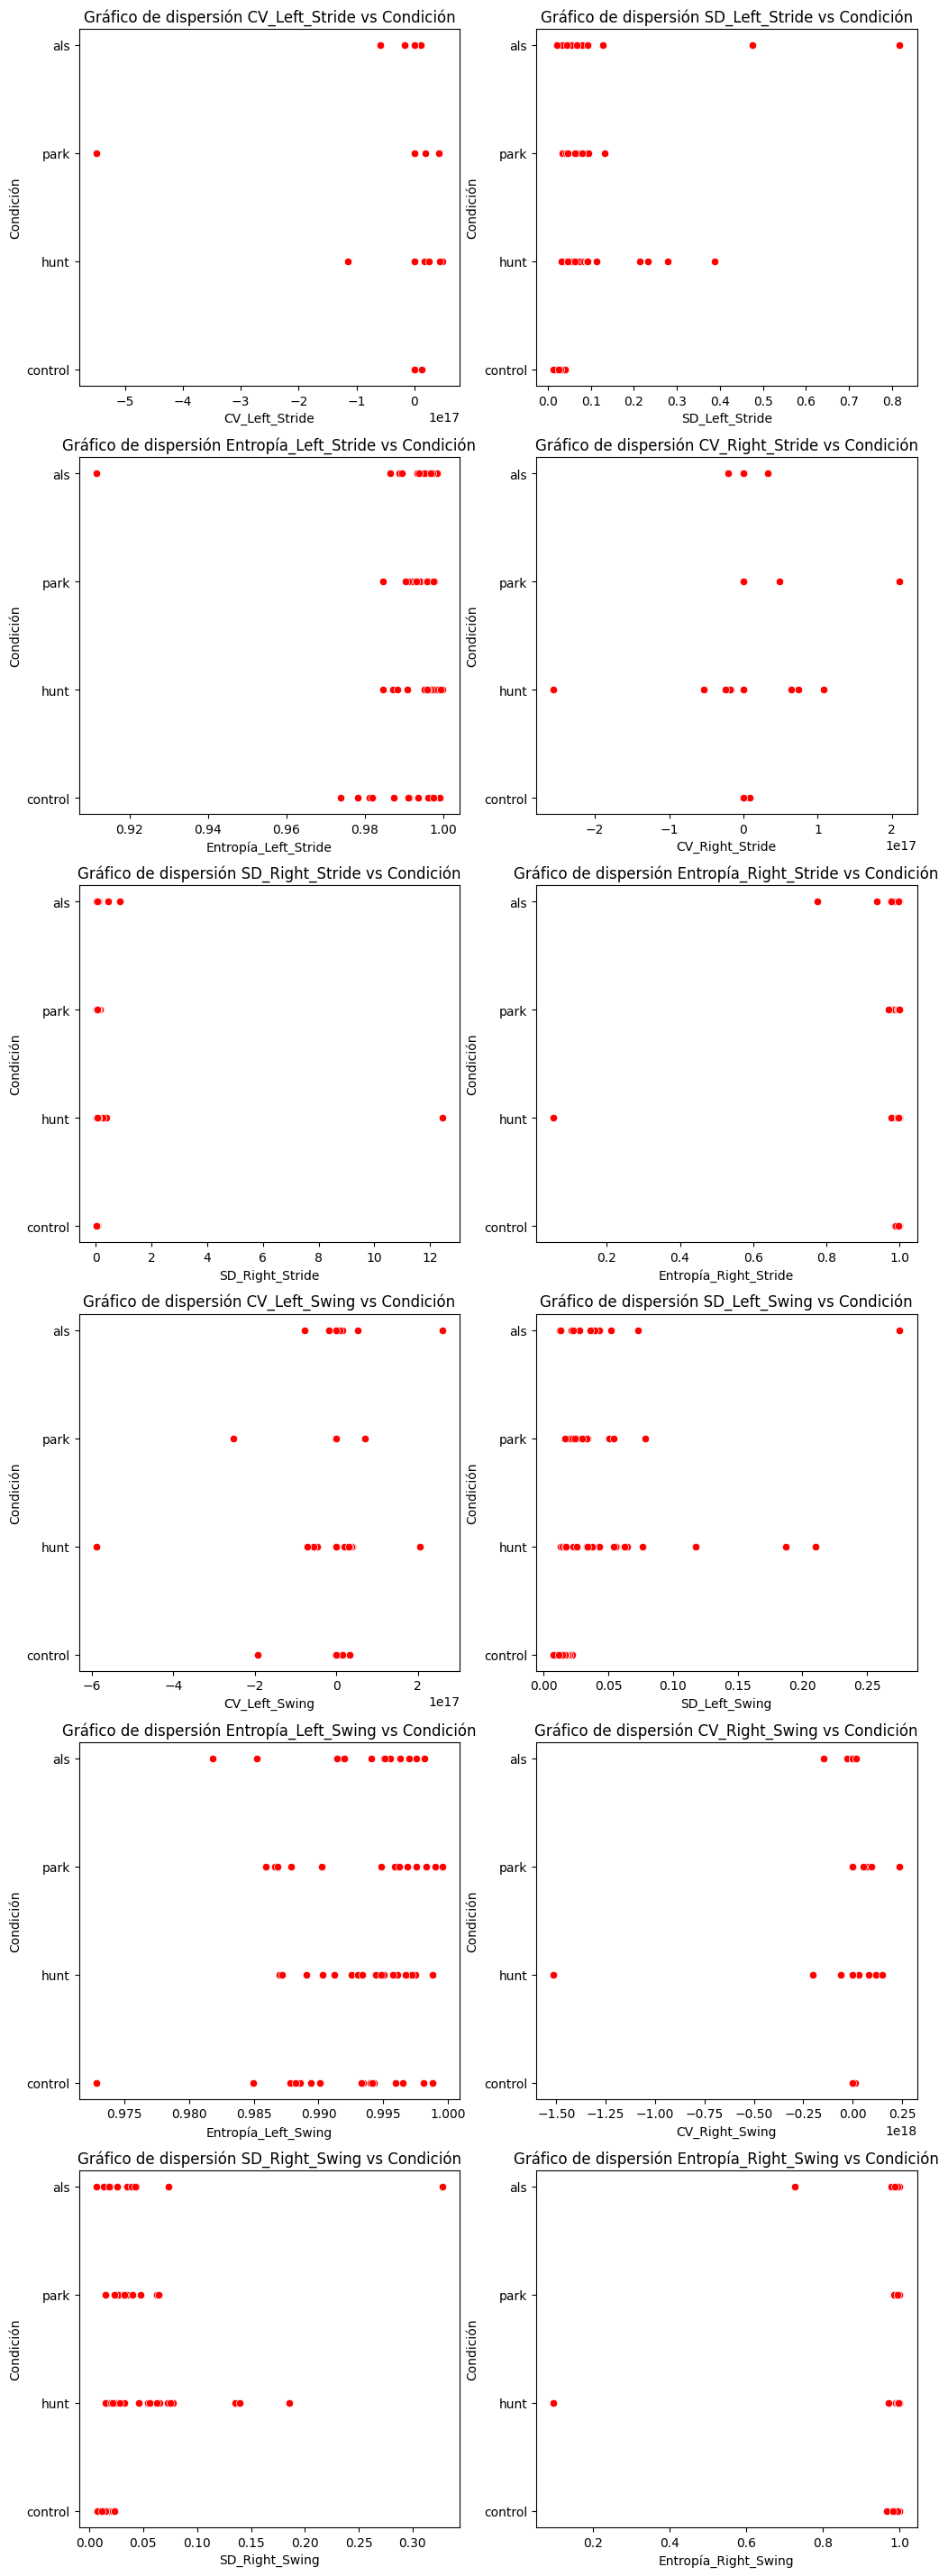

In [ ]:
fig, axs = plt.subplots(nrows=6, ncols=2, figsize=(12,36))
for i, señal in enumerate(señales_de_marcha):
    ax = axs[i // 2, i % 2]
    sns.scatterplot(data=df_datos, x=señal, y='Condición', ax=ax, color="r")
    ax.set_title(f'Gráfico de dispersión {señal} vs Condición')
    ax.set_xlabel(señal)
    ax.set_ylabel('Condición')
plt.show()

**Análisis**:

### **Gráficos de cajas y bigotes**

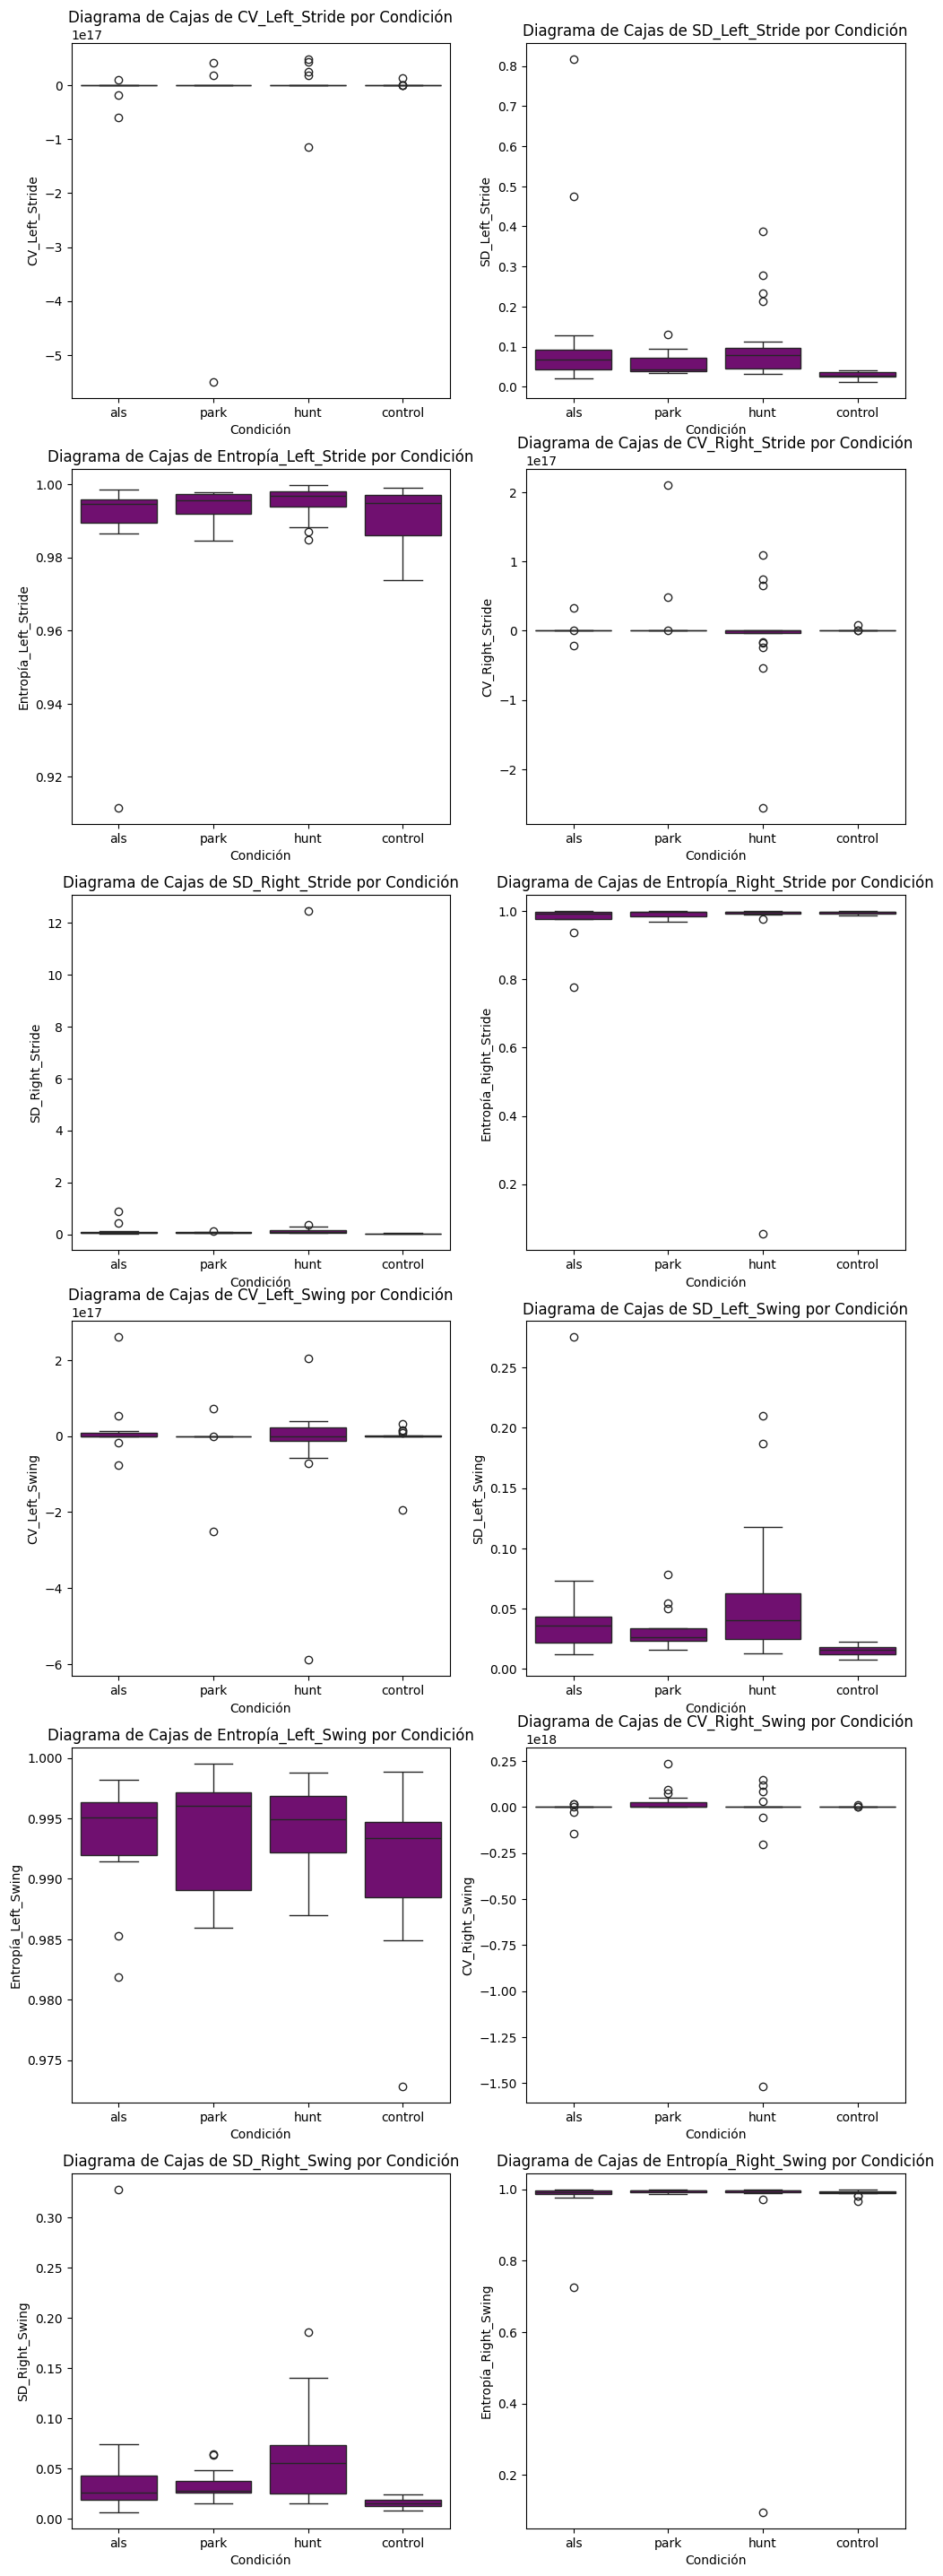

In [ ]:
señales_de_marcha = df_datos.iloc[:,2:]
fig, axs = plt.subplots(nrows=6, ncols=2, figsize=(12,36))
for i, señal in enumerate(señales_de_marcha):
    ax = axs[i // 2, i % 2]
    sns.boxplot(data=df_datos, x='Condición', y=señal, ax=ax, color="purple")
    ax.set_title(f'Diagrama de Cajas de {señal} por Condición')
    ax.set_xlabel('Condición')
    ax.set_ylabel(señal)
plt.show()

**Análisis**

## **Estadística Inferencial**

In [ ]:
# Se extraen solo las 12 columnas pertenecientes a las señales de marcha de cada grupo
df_ALS_señales = df_ALS.iloc[:,2:]
df_Park_señales =  df_Park.iloc[:,2:]
df_Hunt_señales =  df_Hunt.iloc[:,2:]
df_Control_señales =  df_Hunt.iloc[:,2:]

Para identificar si es posible aplicar pruebas paramétricas o no, se debe cumplir los supuestos de normalidad, homocedasticidad e indepdencia entre las variables, por lo que a continuación, se realizarán una análisis de estos supuestos:

### **Prueba de normalidad:**

Debido a que contamos con 64 sujetos, un grupo pequeño, se utilizará la prueba de Shapiro Wilks para determinar si los datos de cada grupo provienen o no distribuciones normales

**Supuestos de normalidad**

- **Hipótesis Nula (H0)**: los datos siguen una distribución normal

- **Hipótesis Alternativa (Ha)**:los datos no siguen una distribución normal

In [ ]:
# Prueba de Normalidad
def normalidad_shapiro(df_señal):
  columnas_df = df_señal.columns
  for i in columnas_df:
    stat_normalidad, p_valor_normalidad = stats.shapiro(df_señal[i])
    alfa = 0.05  # Nivel de significancia
    if p_valor_normalidad > alfa:
      print(f'{i}: p-value = {p_valor_normalidad}. No se rechaza la hipótesis nula. Los datos siguen una distribución normal.')
    else:
      print(f'{i}: p-value = {p_valor_normalidad}. Se rechaza la hipótesis nula. Los datos no siguen una distribución normal.')

In [ ]:
print("Pruba de normalidad para el grupo Control: \n")
normalidad_shapiro(df_Control_señales)
print("\n")
print("Pruba de normalidad para el grupo Parkinson: \n")
normalidad_shapiro(df_Park_señales)
print("\n")
print("Pruba de normalidad para el grupo Huntington: \n")
normalidad_shapiro(df_Hunt_señales)
print("\n")
print("Pruba de normalidad para el grupo ELA: \n")
normalidad_shapiro(df_ALS_señales)

Pruba de normalidad para el grupo Control: 

CV_Left_Stride: p-value = 1.1952583940420381e-06. Se rechaza la hipótesis nula. Los datos no siguen una distribución normal.
SD_Left_Stride: p-value = 0.00010717467837246187. Se rechaza la hipótesis nula. Los datos no siguen una distribución normal.
Entropía_Left_Stride: p-value = 0.0029908142632907118. Se rechaza la hipótesis nula. Los datos no siguen una distribución normal.
CV_Right_Stride: p-value = 1.1275116539834069e-05. Se rechaza la hipótesis nula. Los datos no siguen una distribución normal.
SD_Right_Stride: p-value = 3.9952496683378585e-09. Se rechaza la hipótesis nula. Los datos no siguen una distribución normal.
Entropía_Right_Stride: p-value = 3.552234247786604e-09. Se rechaza la hipótesis nula. Los datos no siguen una distribución normal.
CV_Left_Swing: p-value = 1.0433038690864552e-06. Se rechaza la hipótesis nula. Los datos no siguen una distribución normal.
SD_Left_Swing: p-value = 0.0001485533221868924. Se rechaza la hipóte

Según lo evidenciado anteriormente, no se cumple el supuesto de normalidad para ninguno de los grupos

### **Supuesto de Homocedasticidad**

Para verificar si si cumple o no este supuesto, se utilizó la prueba de levene

**Supuestos**:

- **Hipótesis Nula (H0)**:  los datos proceden de distribuciones con la misma varianza

- **Hipótesis Alternativa (Ha)**: los datos no proceden de distribuciones con la misma varianza

In [ ]:
def homocedasticidad_levene(df_señal1, df_señal2):
  columnas_df = df_señal1.columns
  for i in columnas_df:
    stat_homocedasticidad, p_valor_homocedasticidad = stats.levene(df_señal1[i], df_señal2[i])
    alfa = 0.05  # Nivel de significancia
    if p_valor_homocedasticidad > alfa:
      print(f'{i}: p-value = {p_valor_homocedasticidad}. No se rechaza la hipótesis nula. Los datos proceden de distribuciones con la misma varianza.')
    else:
      print(f'{i}: p-value = {p_valor_homocedasticidad}. Se rechaza la hipótesis nula. Los datos no proceden de distribuciones con la misma varianza.')

In [ ]:
print("Pruba de homocedasticidad entre el grupo Control y el grupo con ELA: \n")
homocedasticidad_levene(df_Control_señales,df_ALS_señales)
print("\n")
print("Pruba de homocedasticidad entre el grupo Control y el grupo con Huntington: \n")
homocedasticidad_levene(df_Control_señales,df_Hunt_señales)
print("\n")
print("Pruba de homocedasticidad entre el grupo Control y el grupo con Parkinson: \n")
homocedasticidad_levene(df_Control_señales,df_Park_señales)
print("\n")
print("Pruba de homocedasticidad entre el grupo Huntington y el grupo con ELA: \n")
homocedasticidad_levene(df_Hunt_señales,df_ALS_señales)
print("\n")
print("Pruba de homocedasticidad entre el grupo Huntington y el grupo con Parkinson: \n")
homocedasticidad_levene(df_Hunt_señales,df_Park_señales)
print("\n")
print("Pruba de homocedasticidad entre el grupo Parkinson y el grupo con ELA: \n")
homocedasticidad_levene(df_Park_señales,df_ALS_señales)
print("\n")

Pruba de homocedasticidad entre el grupo Control y el grupo con ELA: 

CV_Left_Stride: p-value = 0.514383523807211. No se rechaza la hipótesis nula. Los datos proceden de distribuciones con la misma varianza.
SD_Left_Stride: p-value = 0.3550634931865686. No se rechaza la hipótesis nula. Los datos proceden de distribuciones con la misma varianza.
Entropía_Left_Stride: p-value = 0.2549865130539635. No se rechaza la hipótesis nula. Los datos proceden de distribuciones con la misma varianza.
CV_Right_Stride: p-value = 0.13452223438562252. No se rechaza la hipótesis nula. Los datos proceden de distribuciones con la misma varianza.
SD_Right_Stride: p-value = 0.46750179852346985. No se rechaza la hipótesis nula. Los datos proceden de distribuciones con la misma varianza.
Entropía_Right_Stride: p-value = 0.6988856394946371. No se rechaza la hipótesis nula. Los datos proceden de distribuciones con la misma varianza.
CV_Left_Swing: p-value = 0.5249812781828991. No se rechaza la hipótesis nula. L

Para el supuesto de Homocedasticidad se evidencia que para los todos los grupos, los datos provienen de distribuciones con la misma varianza, es decir que la variabilidad de los errores es constante, lo que nos permite reconocer que estos datos pueden utilizarse para hacer predicciones a través de modelos confiables [3].

[3]:https://www.euroinnova.com/ciencia-de-datos-e-inteligencia-artificial/articulos/homocedasticidad#:~:text=En%20estad%C3%ADsticas%2C%20un%20modelo%20presenta,que%20bailan%20a%20diferentes%20velocidades.

### **Supuesto Independencia de las observaciones**

Para verificar el cumplimiento o no de este supuesto, se realizó una matríz de correlación para cada grupo, con el fin de identificar como se relacionan o dependen entre sí las variables

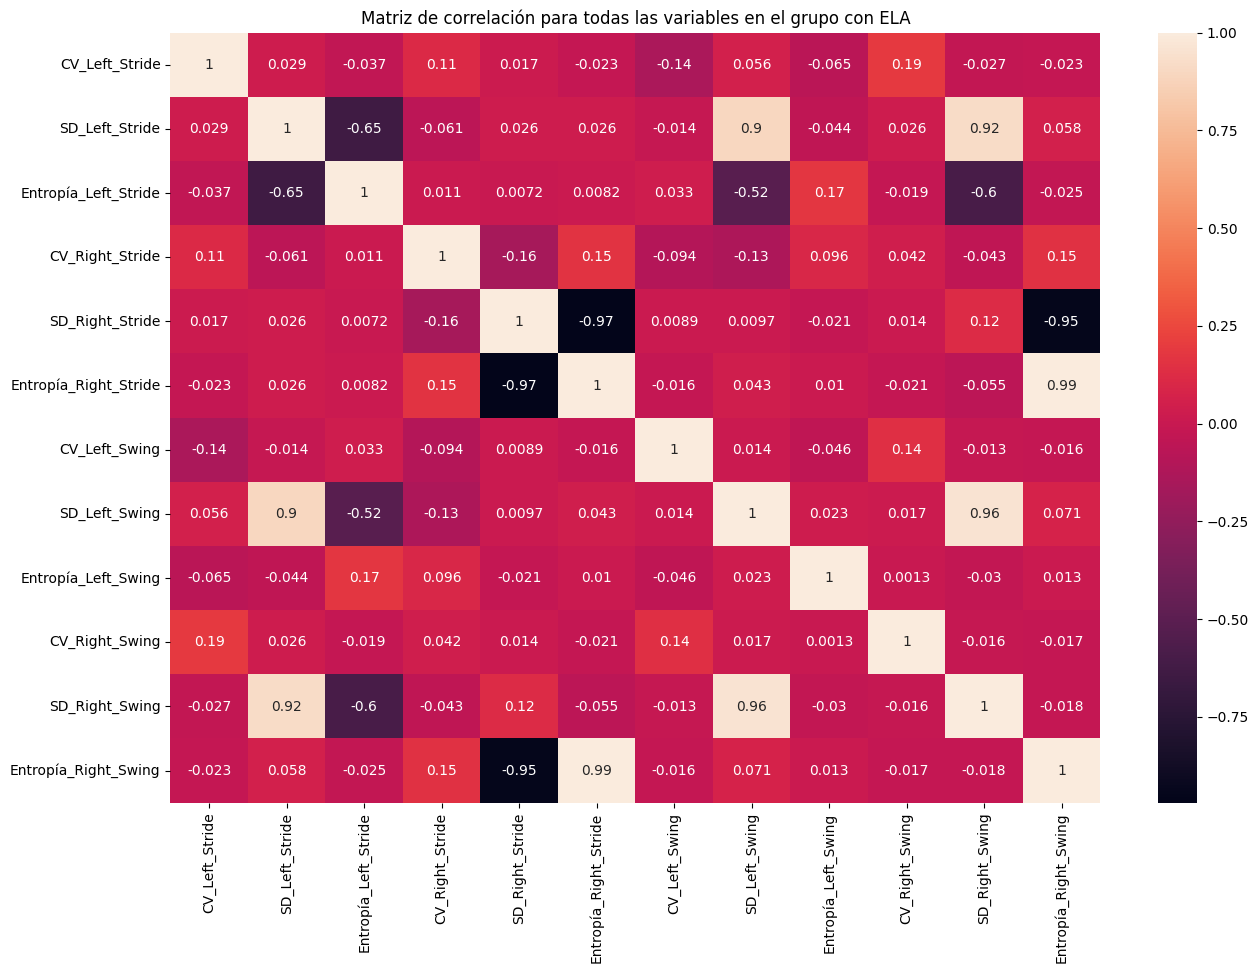

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(señales_de_marcha.corr(),fmt='.2g',annot=True)
plt.title("Matriz de correlación para todas las variables de cada grupo")
plt.show()

De la matriz presentada anteriormente, se puede concluir que en su mayoría se obtuvieron correlaciones positivas y negativas. Sin embargo, también existen variables sin correlación como en las variables de entropía y SD de las señales de marcha Right_Stride y Right_Swing ya que su valor de correlación es cercano a -1

Finalmente, se concluye que para estos datos, **no se cumple el supuesto de independencia entre las variables**

Según lo evidenciado al evaluar los 3 supuestos, si bien se cumple el supuesto de homocedasticidad, los datos no provienen de distribuciones normales, por lo que se decidió que no es factible utilizar pruebas paramétricas para realizar el análisis inferencial

## **Prueba no Paramétrica: U de Mann-Whitney**

Se decidió utilizar esta prueba debido a que no se cumplió el supuesto de normalidad para el conjunto de datos. Además, si se cumplió el supuesto de homogeneidad en las varianzas (homocedasticidad). Por otra parte, esta prueba es útil si los datos son independientes, lo cual no se cumple concretamente para nuestros datos, sin embargo, las correlaciones no son muy fuertes como se pudo evidenciar en la matriz de correlacion

Debido a que el supuesto de normalidad no se cumplió, se decide no utilizar una prueba paramétrica sino la prueba no paramétrica de MannWhitney U

In [ ]:
def prueba_no_parametrica_mannwhitneyu(df1,df2):
  stat_no_parametrica, p_valor_no_parametrica = stats.mannwhitneyu(df1, df2, alternative='two-sided')
  alfa = 0.05  # Nivel de significancia
  if p_valor_no_parametrica < alfa:
    print(f'p-value = {p_valor_no_parametrica} Se rechaza la hipótesis nula. \n Hay evidencia de diferencia entre los grupos evaluados')
  else:
    print(f'p-value = {p_valor_no_parametrica} No hay suficiente evidencia para rechazar la hipótesis nula. \n No se encontró diferencia significativa entre los grupos evaluados')


In [ ]:
cv_LS_ALS = df_ALS_señales['CV_Left_Stride']
sd_LS_ALS = df_ALS_señales['SD_Left_Stride']
EP_LS_ALS = df_ALS_señales['Entropía_Left_Stride']
cv_RS_ALS = df_ALS_señales['CV_Right_Stride']
sd_RS_ALS = df_ALS_señales['SD_Right_Stride']
EP_RS_ALS = df_ALS_señales['Entropía_Right_Stride']
cv_LW_ALS = df_ALS_señales['CV_Left_Swing']
sd_LW_ALS = df_ALS_señales['SD_Left_Swing']
EP_LW_ALS = df_ALS_señales['Entropía_Left_Swing']
cv_RW_ALS = df_ALS_señales['CV_Right_Swing']
sd_RW_ALS = df_ALS_señales['SD_Right_Swing']
EP_RW_ALS = df_ALS_señales['Entropía_Right_Swing']

cv_LS_Park = df_Park_señales['CV_Left_Stride']
sd_LS_Park = df_Park_señales['SD_Left_Stride']
EP_LS_Park = df_Park_señales['Entropía_Left_Stride']
cv_RS_Park = df_Park_señales['CV_Right_Stride']
sd_RS_Park = df_Park_señales['SD_Right_Stride']
EP_RS_Park = df_Park_señales['Entropía_Right_Stride']
cv_LW_Park = df_Park_señales['CV_Left_Swing']
sd_LW_Park = df_Park_señales['SD_Left_Swing']
EP_LW_Park = df_Park_señales['Entropía_Left_Swing']
cv_RW_Park = df_Park_señales['CV_Right_Swing']
sd_RW_Park = df_Park_señales['SD_Right_Swing']
EP_RW_Park = df_Park_señales['Entropía_Right_Swing']

cv_LS_Hunt = df_Hunt_señales['CV_Left_Stride']
sd_LS_Hunt = df_Hunt_señales['SD_Left_Stride']
EP_LS_Hunt = df_Hunt_señales['Entropía_Left_Stride']
cv_RS_Hunt = df_Hunt_señales['CV_Right_Stride']
sd_RS_Hunt = df_Hunt_señales['SD_Right_Stride']
EP_RS_Hunt = df_Hunt_señales['Entropía_Right_Stride']
cv_LW_Hunt = df_Hunt_señales['CV_Left_Swing']
sd_LW_Hunt = df_Hunt_señales['SD_Left_Swing']
EP_LW_Hunt = df_Hunt_señales['Entropía_Left_Swing']
cv_RW_Hunt = df_Hunt_señales['CV_Right_Swing']
sd_RW_Hunt = df_Hunt_señales['SD_Right_Swing']
EP_RW_Hunt = df_Hunt_señales['Entropía_Right_Swing']

cv_LS_Control = df_Control_señales['CV_Left_Stride']
sd_LS_Control = df_Control_señales['SD_Left_Stride']
EP_LS_Control = df_Control_señales['Entropía_Left_Stride']
cv_RS_Control = df_Control_señales['CV_Right_Stride']
sd_RS_Control = df_Control_señales['SD_Right_Stride']
EP_RS_Control = df_Control_señales['Entropía_Right_Stride']
cv_LW_Control = df_Control_señales['CV_Left_Swing']
sd_LW_Control = df_Control_señales['SD_Left_Swing']
EP_LW_Control = df_Control_señales['Entropía_Left_Swing']
cv_RW_Control = df_Control_señales['CV_Right_Swing']
sd_RW_Control = df_Control_señales['SD_Right_Swing']
EP_RW_Control = df_Control_señales['Entropía_Right_Swing']


In [ ]:
print("------- Pruba de No paramétrica para la variable cv_Left_Stride------------------------")
print("\nEntre el grupo Control y el grupo con ELA:")
prueba_no_parametrica_mannwhitneyu(cv_LS_Control, cv_LS_ALS)
print("\nEntre el grupo Control y el grupo con Huntington:")
prueba_no_parametrica_mannwhitneyu(cv_LS_Control, cv_LS_Hunt)
print("\nEntre el grupo Control y el grupo con Parkinson:")
prueba_no_parametrica_mannwhitneyu(cv_LS_Control, cv_LS_Park)
print("\nEntre el grupo ELA y el grupo con Huntington:")
prueba_no_parametrica_mannwhitneyu(cv_LS_ALS, cv_LS_Hunt)
print("\nEntre el grupo ELA y el grupo con Parkinson:")
prueba_no_parametrica_mannwhitneyu(cv_LS_ALS, cv_LS_Park)
print("\nEntre el grupo Huntington y el grupo con Parkinson:")
prueba_no_parametrica_mannwhitneyu(cv_LS_Hunt, cv_LS_Park)

------- Pruba de No paramétrica para la variable cv_Left_Stride------------------------

Entre el grupo Control y el grupo con ELA:
p-value = 0.8683166060584981 No hay suficiente evidencia para rechazar la hipótesis nula. 
 No se encontró diferencia significativa entre los grupos evaluados

Entre el grupo Control y el grupo con Huntington:
p-value = 1.0 No hay suficiente evidencia para rechazar la hipótesis nula. 
 No se encontró diferencia significativa entre los grupos evaluados

Entre el grupo Control y el grupo con Parkinson:
p-value = 0.8025873486341526 No hay suficiente evidencia para rechazar la hipótesis nula. 
 No se encontró diferencia significativa entre los grupos evaluados

Entre el grupo ELA y el grupo con Huntington:
p-value = 0.8683166060584981 No hay suficiente evidencia para rechazar la hipótesis nula. 
 No se encontró diferencia significativa entre los grupos evaluados

Entre el grupo ELA y el grupo con Parkinson:
p-value = 0.7471061995484956 No hay suficiente eviden

Se puede concluir de lo anterior, que **para la variable CV_Left_Stride no existen diferencias significativas entre los grupos evaluados**, por lo que **el coeficiente de variación para la zancada del pie izquierdo no es una variable que pueda ser discriminativa entre cada enfermedad y los pacientes control**

In [ ]:
print("-------------Pruba de No paramétrica para la variable sd_Left_Stride-------------------")
print("\nEntre el grupo Control y el grupo con ELA:")
prueba_no_parametrica_mannwhitneyu(sd_LS_Control, sd_LS_ALS)
print("\nEntre el grupo Control y el grupo con Huntington:")
prueba_no_parametrica_mannwhitneyu(sd_LS_Control, sd_LS_Hunt)
print("\nEntre el grupo Control y el grupo con Parkinson:")
prueba_no_parametrica_mannwhitneyu(sd_LS_Control, sd_LS_Park)
print("\nEntre el grupo ELA y el grupo con Huntington:")
prueba_no_parametrica_mannwhitneyu(sd_LS_ALS, sd_LS_Hunt)
print("\nEntre el grupo ELA y el grupo con Parkinson:")
prueba_no_parametrica_mannwhitneyu(sd_LS_ALS, sd_LS_Park)
print("\nEntre el grupo Huntington y el grupo con Parkinson:")
prueba_no_parametrica_mannwhitneyu(sd_LS_Hunt, sd_LS_Park)

-------------Pruba de No paramétrica para la variable sd_Left_Stride-------------------

Entre el grupo Control y el grupo con ELA:
p-value = 0.6717818635319417 No hay suficiente evidencia para rechazar la hipótesis nula. 
 No se encontró diferencia significativa entre los grupos evaluados

Entre el grupo Control y el grupo con Huntington:
p-value = 1.0 No hay suficiente evidencia para rechazar la hipótesis nula. 
 No se encontró diferencia significativa entre los grupos evaluados

Entre el grupo Control y el grupo con Parkinson:
p-value = 0.06431354959122743 No hay suficiente evidencia para rechazar la hipótesis nula. 
 No se encontró diferencia significativa entre los grupos evaluados

Entre el grupo ELA y el grupo con Huntington:
p-value = 0.6717818635319417 No hay suficiente evidencia para rechazar la hipótesis nula. 
 No se encontró diferencia significativa entre los grupos evaluados

Entre el grupo ELA y el grupo con Parkinson:
p-value = 0.38144249774582006 No hay suficiente evid

Se puede concluir de lo anterior, que **para la variable SD_Left_Stride no existen diferencias significativas entre los grupos evaluados**, por lo que **las desviación estándar para la zancada del pie izquierdo no es una variable que pueda ser discriminativa entre cada enfermedad y los pacientes control**

In [ ]:
print("-------------Pruba de No paramétrica para la variable EP_Left_Stride-------------------")
print("\nEntre el grupo Control y el grupo con ELA:")
prueba_no_parametrica_mannwhitneyu(EP_LS_Control, EP_LS_ALS)
print("\nEntre el grupo Control y el grupo con Huntington:")
prueba_no_parametrica_mannwhitneyu(EP_LS_Control, EP_LS_Hunt)
print("\nEntre el grupo Control y el grupo con Parkinson:")
prueba_no_parametrica_mannwhitneyu(EP_LS_Control, EP_LS_Park)
print("\nEntre el grupo ELA y el grupo con Huntington:")
prueba_no_parametrica_mannwhitneyu(EP_LS_ALS, EP_LS_Hunt)
print("\nEntre el grupo ELA y el grupo con Parkinson:")
prueba_no_parametrica_mannwhitneyu(EP_LS_ALS, EP_LS_Park)
print("\nEntre el grupo Huntington y el grupo con Parkinson:")
prueba_no_parametrica_mannwhitneyu(EP_LS_Hunt, EP_LS_Park)

-------------Pruba de No paramétrica para la variable EP_Left_Stride-------------------

Entre el grupo Control y el grupo con ELA:
p-value = 0.08010437235277022 No hay suficiente evidencia para rechazar la hipótesis nula. 
 No se encontró diferencia significativa entre los grupos evaluados

Entre el grupo Control y el grupo con Huntington:
p-value = 1.0 No hay suficiente evidencia para rechazar la hipótesis nula. 
 No se encontró diferencia significativa entre los grupos evaluados

Entre el grupo Control y el grupo con Parkinson:
p-value = 0.34211225261696365 No hay suficiente evidencia para rechazar la hipótesis nula. 
 No se encontró diferencia significativa entre los grupos evaluados

Entre el grupo ELA y el grupo con Huntington:
p-value = 0.08010437235277022 No hay suficiente evidencia para rechazar la hipótesis nula. 
 No se encontró diferencia significativa entre los grupos evaluados

Entre el grupo ELA y el grupo con Parkinson:
p-value = 0.38144249774582006 No hay suficiente ev

Se puede concluir de lo anterior, que **para la variable EP_Left_Stride no existen diferencias significativas entre los grupos evaluados**, por lo que **la entropía de perm para la zancada del pie izquierdo no es una variable que pueda ser discriminativa entre cada enfermedad y los pacientes control**

In [ ]:
print("-------------Pruba de No paramétrica para la variable CV_Right_Stride-------------------")
print("\nEntre el grupo Control y el grupo con ELA:")
prueba_no_parametrica_mannwhitneyu(cv_RS_Control, cv_LS_ALS)
print("\nEntre el grupo Control y el grupo con Huntington:")
prueba_no_parametrica_mannwhitneyu(cv_RS_Control, cv_RS_Hunt)
print("\nEntre el grupo Control y el grupo con Parkinson:")
prueba_no_parametrica_mannwhitneyu(cv_RS_Control, cv_RS_Park)
print("\nEntre el grupo ELA y el grupo con Huntington:")
prueba_no_parametrica_mannwhitneyu(cv_RS_ALS, cv_RS_Hunt)
print("\nEntre el grupo ELA y el grupo con Parkinson:")
prueba_no_parametrica_mannwhitneyu(cv_RS_ALS, cv_RS_Park)
print("\nEntre el grupo Huntington y el grupo con Parkinson:")
prueba_no_parametrica_mannwhitneyu(cv_RS_Hunt, cv_RS_Park)


-------------Pruba de No paramétrica para la variable CV_Right_Stride-------------------

Entre el grupo Control y el grupo con ELA:
p-value = 0.2611250000774915 No hay suficiente evidencia para rechazar la hipótesis nula. 
 No se encontró diferencia significativa entre los grupos evaluados

Entre el grupo Control y el grupo con Huntington:
p-value = 1.0 No hay suficiente evidencia para rechazar la hipótesis nula. 
 No se encontró diferencia significativa entre los grupos evaluados

Entre el grupo Control y el grupo con Parkinson:
p-value = 0.0266458782221335 Se rechaza la hipótesis nula. 
 Hay evidencia de diferencia entre los grupos evaluados

Entre el grupo ELA y el grupo con Huntington:
p-value = 0.057767777407812256 No hay suficiente evidencia para rechazar la hipótesis nula. 
 No se encontró diferencia significativa entre los grupos evaluados

Entre el grupo ELA y el grupo con Parkinson:
p-value = 0.8538084126585609 No hay suficiente evidencia para rechazar la hipótesis nula. 
 N

Se puede concluir de lo anterior, que **la variable CV_Right_Stride puede ser discriminatoria entre pacientes control y pacientes con Parkinson y entre pacientes con Parkinson y pacientes con Huntington**

In [ ]:
print("-------------Pruba de No paramétrica para la variable SD_Right_Stride-------------------")
print("\nEntre el grupo Control y el grupo con ELA:")
prueba_no_parametrica_mannwhitneyu(sd_RS_Control, sd_RS_ALS)
print("\nEntre el grupo Control y el grupo con Huntington:")
prueba_no_parametrica_mannwhitneyu(sd_RS_Control, sd_RS_Hunt)
print("\nEntre el grupo Control y el grupo con Parkinson:")
prueba_no_parametrica_mannwhitneyu(sd_RS_Control, sd_RS_Park)
print("\nEntre el grupo ELA y el grupo con Huntington:")
prueba_no_parametrica_mannwhitneyu(sd_RS_ALS, sd_RS_Hunt)
print("\nEntre el grupo ELA y el grupo con Parkinson:")
prueba_no_parametrica_mannwhitneyu(sd_RS_ALS, sd_RS_Park)
print("\nEntre el grupo Huntington y el grupo con Parkinson:")
prueba_no_parametrica_mannwhitneyu(sd_RS_Hunt, sd_RS_Park)

-------------Pruba de No paramétrica para la variable SD_Right_Stride-------------------

Entre el grupo Control y el grupo con ELA:
p-value = 0.34746533694432824 No hay suficiente evidencia para rechazar la hipótesis nula. 
 No se encontró diferencia significativa entre los grupos evaluados

Entre el grupo Control y el grupo con Huntington:
p-value = 1.0 No hay suficiente evidencia para rechazar la hipótesis nula. 
 No se encontró diferencia significativa entre los grupos evaluados

Entre el grupo Control y el grupo con Parkinson:
p-value = 0.018773411069677132 Se rechaza la hipótesis nula. 
 Hay evidencia de diferencia entre los grupos evaluados

Entre el grupo ELA y el grupo con Huntington:
p-value = 0.34746533694432824 No hay suficiente evidencia para rechazar la hipótesis nula. 
 No se encontró diferencia significativa entre los grupos evaluados

Entre el grupo ELA y el grupo con Parkinson:
p-value = 0.5804112384153828 No hay suficiente evidencia para rechazar la hipótesis nula. 


Se puede concluir de lo anterior, que **la variable SD_Right_Stride puede ser discriminatoria entre pacientes control y pacientes con Parkinson y entre pacientes con Parkinson y pacientes con Huntington**

In [ ]:
print("-------------Pruba de No paramétrica para la variable EP_Right_Stride-------------------")
print("\nEntre el grupo Control y el grupo con ELA:")
prueba_no_parametrica_mannwhitneyu(EP_RS_Control, EP_RS_ALS)
print("\nEntre el grupo Control y el grupo con Huntington:")
prueba_no_parametrica_mannwhitneyu(EP_RS_Control, EP_RS_Hunt)
print("\nEntre el grupo Control y el grupo con Parkinson:")
prueba_no_parametrica_mannwhitneyu(EP_RS_Control, EP_RS_Park)
print("\nEntre el grupo ELA y el grupo con Huntington:")
prueba_no_parametrica_mannwhitneyu(EP_RS_ALS, EP_RS_Hunt)
print("\nEntre el grupo ELA y el grupo con Parkinson:")
prueba_no_parametrica_mannwhitneyu(EP_RS_ALS, EP_RS_Park)
print("\nEntre el grupo Huntington y el grupo con Parkinson:")
prueba_no_parametrica_mannwhitneyu(EP_RS_Hunt, EP_RS_Park)

-------------Pruba de No paramétrica para la variable EP_Right_Stride-------------------

Entre el grupo Control y el grupo con ELA:
p-value = 0.15604876481480082 No hay suficiente evidencia para rechazar la hipótesis nula. 
 No se encontró diferencia significativa entre los grupos evaluados

Entre el grupo Control y el grupo con Huntington:
p-value = 1.0 No hay suficiente evidencia para rechazar la hipótesis nula. 
 No se encontró diferencia significativa entre los grupos evaluados

Entre el grupo Control y el grupo con Parkinson:
p-value = 0.9071242059901555 No hay suficiente evidencia para rechazar la hipótesis nula. 
 No se encontró diferencia significativa entre los grupos evaluados

Entre el grupo ELA y el grupo con Huntington:
p-value = 0.15604876481480082 No hay suficiente evidencia para rechazar la hipótesis nula. 
 No se encontró diferencia significativa entre los grupos evaluados

Entre el grupo ELA y el grupo con Parkinson:
p-value = 0.21358632775906994 No hay suficiente ev

Se puede concluir de lo anterior, que **para la variable EP_Right_Stride no existen diferencias significativas entre los grupos evaluados**, por lo que **la entropía de permutación para la zancada del pie derecho no es una variable que pueda ser discriminativa entre cada enfermedad y los pacientes control**

In [ ]:
print("-------------Pruba de No paramétrica para la variable CV_Left_Swing-------------------")
print("\nEntre el grupo Control y el grupo con ELA:")
prueba_no_parametrica_mannwhitneyu(cv_LW_Control, cv_LW_ALS)
print("\nEntre el grupo Control y el grupo con Huntington:")
prueba_no_parametrica_mannwhitneyu(cv_LW_Control, cv_LW_Hunt)
print("\nEntre el grupo Control y el grupo con Parkinson:")
prueba_no_parametrica_mannwhitneyu(cv_LW_Control, cv_LW_Park)
print("\nEntre el grupo ELA y el grupo con Huntington:")
prueba_no_parametrica_mannwhitneyu(cv_LW_ALS, cv_LW_Hunt)
print("\nEntre el grupo ELA y el grupo con Parkinson:")
prueba_no_parametrica_mannwhitneyu(cv_LW_ALS, cv_LW_Park)
print("\nEntre el grupo Huntington y el grupo con Parkinson:")
prueba_no_parametrica_mannwhitneyu(cv_LW_Hunt, cv_LW_Park)

-------------Pruba de No paramétrica para la variable CV_Left_Swing-------------------

Entre el grupo Control y el grupo con ELA:
p-value = 0.8107297271774061 No hay suficiente evidencia para rechazar la hipótesis nula. 
 No se encontró diferencia significativa entre los grupos evaluados

Entre el grupo Control y el grupo con Huntington:
p-value = 1.0 No hay suficiente evidencia para rechazar la hipótesis nula. 
 No se encontró diferencia significativa entre los grupos evaluados

Entre el grupo Control y el grupo con Parkinson:
p-value = 0.7263386976487618 No hay suficiente evidencia para rechazar la hipótesis nula. 
 No se encontró diferencia significativa entre los grupos evaluados

Entre el grupo ELA y el grupo con Huntington:
p-value = 0.8107297271774061 No hay suficiente evidencia para rechazar la hipótesis nula. 
 No se encontró diferencia significativa entre los grupos evaluados

Entre el grupo ELA y el grupo con Parkinson:
p-value = 0.5804112384153828 No hay suficiente evidenc

Se puede concluir de lo anterior, que **para la variable CV_Left_Swing no existen diferencias significativas entre los grupos evaluados**, por lo que **el coeficiente de variación para el balanceo del pie izquierdo no es una variable que pueda ser discriminativa entre cada enfermedad y los pacientes control**

In [ ]:
print("-------------Pruba de No paramétrica para la variable SD_Left_Swing-------------------")
print("\nEntre el grupo Control y el grupo con ELA:")
prueba_no_parametrica_mannwhitneyu(sd_LW_Control, sd_LW_ALS)
print("\nEntre el grupo Control y el grupo con Huntington:")
prueba_no_parametrica_mannwhitneyu(sd_LW_Control, sd_RS_Hunt)
print("\nEntre el grupo Control y el grupo con Parkinson:")
prueba_no_parametrica_mannwhitneyu(sd_LW_Control, sd_LW_Park)
print("\nEntre el grupo ELA y el grupo con Huntington:")
prueba_no_parametrica_mannwhitneyu(sd_LW_ALS, sd_LW_Hunt)
print("\nEntre el grupo ELA y el grupo con Parkinson:")
prueba_no_parametrica_mannwhitneyu(sd_LW_ALS, sd_LW_Park)
print("\nEntre el grupo Huntington y el grupo con Parkinson:")
prueba_no_parametrica_mannwhitneyu(sd_LW_Hunt, sd_LW_Park)

-------------Pruba de No paramétrica para la variable SD_Left_Swing-------------------

Entre el grupo Control y el grupo con ELA:
p-value = 0.31096240865000846 No hay suficiente evidencia para rechazar la hipótesis nula. 
 No se encontró diferencia significativa entre los grupos evaluados

Entre el grupo Control y el grupo con Huntington:
p-value = 0.003966238640223918 Se rechaza la hipótesis nula. 
 Hay evidencia de diferencia entre los grupos evaluados

Entre el grupo Control y el grupo con Parkinson:
p-value = 0.0989429360672962 No hay suficiente evidencia para rechazar la hipótesis nula. 
 No se encontró diferencia significativa entre los grupos evaluados

Entre el grupo ELA y el grupo con Huntington:
p-value = 0.31096240865000846 No hay suficiente evidencia para rechazar la hipótesis nula. 
 No se encontró diferencia significativa entre los grupos evaluados

Entre el grupo ELA y el grupo con Parkinson:
p-value = 0.8178378992551184 No hay suficiente evidencia para rechazar la hipó

Se puede concluir de lo anterior, que **para la variable SD_Left_Swing no existen diferencias significativas entre los grupos evaluados**, por lo que **la desviación estándar: para el balanceo del pie izquierdo no es una variable que pueda ser discriminativa entre cada enfermedad y los pacientes control**

In [ ]:
print("-------------Pruba de No paramétrica para la variable EP_Left_Swing-------------------")
print("\nEntre el grupo Control y el grupo con ELA:")
prueba_no_parametrica_mannwhitneyu(EP_LW_Control, EP_LW_ALS)
print("\nEntre el grupo Control y el grupo con Huntington:")
prueba_no_parametrica_mannwhitneyu(EP_LW_Control, EP_RS_Hunt)
print("\nEntre el grupo Control y el grupo con Parkinson:")
prueba_no_parametrica_mannwhitneyu(EP_LW_Control, EP_LW_Park)
print("\nEntre el grupo ELA y el grupo con Huntington:")
prueba_no_parametrica_mannwhitneyu(EP_LW_ALS, EP_LW_Hunt)
print("\nEntre el grupo ELA y el grupo con Parkinson:")
prueba_no_parametrica_mannwhitneyu(EP_LW_ALS, EP_LW_Park)
print("\nEntre el grupo Huntington y el grupo con Parkinson:")
prueba_no_parametrica_mannwhitneyu(EP_LW_Hunt, EP_LW_Park)

-------------Pruba de No paramétrica para la variable EP_Left_Swing-------------------

Entre el grupo Control y el grupo con ELA:
p-value = 1.0 No hay suficiente evidencia para rechazar la hipótesis nula. 
 No se encontró diferencia significativa entre los grupos evaluados

Entre el grupo Control y el grupo con Huntington:
p-value = 0.39417090995164517 No hay suficiente evidencia para rechazar la hipótesis nula. 
 No se encontró diferencia significativa entre los grupos evaluados

Entre el grupo Control y el grupo con Parkinson:
p-value = 0.8545364813939189 No hay suficiente evidencia para rechazar la hipótesis nula. 
 No se encontró diferencia significativa entre los grupos evaluados

Entre el grupo ELA y el grupo con Huntington:
p-value = 1.0 No hay suficiente evidencia para rechazar la hipótesis nula. 
 No se encontró diferencia significativa entre los grupos evaluados

Entre el grupo ELA y el grupo con Parkinson:
p-value = 0.5189823900781524 No hay suficiente evidencia para rechaz

Se puede concluir de lo anterior, que **para la variable EP_Left_Swing no existen diferencias significativas entre los grupos evaluados**, por lo que **la entropía de permutaciones para el balanceo del pie izquierdo no es una variable que pueda ser discriminativa entre cada enfermedad y los pacientes control**

In [ ]:
print("-------------Pruba de No paramétrica para la variable CV_Right_Swing-------------------")
print("\nEntre el grupo Control y el grupo con ELA:")
prueba_no_parametrica_mannwhitneyu(cv_RW_Control, cv_RW_ALS)
print("\nEntre el grupo Control y el grupo con Huntington:")
prueba_no_parametrica_mannwhitneyu(cv_RW_Control, cv_RW_Hunt)
print("\nEntre el grupo Control y el grupo con Parkinson:")
prueba_no_parametrica_mannwhitneyu(cv_RW_Control, cv_RW_Park)
print("\nEntre el grupo ELA y el grupo con Huntington:")
prueba_no_parametrica_mannwhitneyu(cv_RW_ALS, cv_RW_Hunt)
print("\nEntre el grupo ELA y el grupo con Parkinson:")
prueba_no_parametrica_mannwhitneyu(cv_RW_ALS, cv_RW_Park)
print("\nEntre el grupo Huntington y el grupo con Parkinson:")
prueba_no_parametrica_mannwhitneyu(cv_RW_Hunt, cv_RW_Park)

-------------Pruba de No paramétrica para la variable CV_Right_Swing-------------------

Entre el grupo Control y el grupo con ELA:
p-value = 0.8973945839305384 No hay suficiente evidencia para rechazar la hipótesis nula. 
 No se encontró diferencia significativa entre los grupos evaluados

Entre el grupo Control y el grupo con Huntington:
p-value = 1.0 No hay suficiente evidencia para rechazar la hipótesis nula. 
 No se encontró diferencia significativa entre los grupos evaluados

Entre el grupo Control y el grupo con Parkinson:
p-value = 0.05528029258602077 No hay suficiente evidencia para rechazar la hipótesis nula. 
 No se encontró diferencia significativa entre los grupos evaluados

Entre el grupo ELA y el grupo con Huntington:
p-value = 0.8973945839305384 No hay suficiente evidencia para rechazar la hipótesis nula. 
 No se encontró diferencia significativa entre los grupos evaluados

Entre el grupo ELA y el grupo con Parkinson:
p-value = 0.08003499283409066 No hay suficiente evid

Se puede concluir de lo anterior, que **para la variable CV_Right_Swing no existen diferencias significativas entre los grupos evaluados**, por lo que **el coeficiente de variación para el balanceo del pie derecho no es una variable que pueda ser discriminativa entre cada enfermedad y los pacientes control**

In [ ]:
print("-------------Pruba de No paramétrica para la variable SD_Right_Swing-------------------")
print("\nEntre el grupo Control y el grupo con ELA:")
prueba_no_parametrica_mannwhitneyu(sd_RW_Control, sd_RW_ALS)
print("\nEntre el grupo Control y el grupo con Huntington:")
prueba_no_parametrica_mannwhitneyu(sd_RW_Control, sd_RW_Hunt)
print("\nEntre el grupo Control y el grupo con Parkinson:")
prueba_no_parametrica_mannwhitneyu(sd_RW_Control, sd_RW_Park)
print("\nEntre el grupo ELA y el grupo con Huntington:")
prueba_no_parametrica_mannwhitneyu(sd_RW_ALS, sd_RW_Hunt)
print("\nEntre el grupo ELA y el grupo con Parkinson:")
prueba_no_parametrica_mannwhitneyu(sd_RW_ALS, sd_RW_Park)
print("\nEntre el grupo Huntington y el grupo con Parkinson:")
prueba_no_parametrica_mannwhitneyu(sd_RW_Hunt, sd_RW_Park)

-------------Pruba de No paramétrica para la variable SD_Right_Swing-------------------

Entre el grupo Control y el grupo con ELA:
p-value = 0.10109889531396785 No hay suficiente evidencia para rechazar la hipótesis nula. 
 No se encontró diferencia significativa entre los grupos evaluados

Entre el grupo Control y el grupo con Huntington:
p-value = 1.0 No hay suficiente evidencia para rechazar la hipótesis nula. 
 No se encontró diferencia significativa entre los grupos evaluados

Entre el grupo Control y el grupo con Parkinson:
p-value = 0.11334550921952584 No hay suficiente evidencia para rechazar la hipótesis nula. 
 No se encontró diferencia significativa entre los grupos evaluados

Entre el grupo ELA y el grupo con Huntington:
p-value = 0.10109889531396785 No hay suficiente evidencia para rechazar la hipótesis nula. 
 No se encontró diferencia significativa entre los grupos evaluados

Entre el grupo ELA y el grupo con Parkinson:
p-value = 0.7471061995484956 No hay suficiente evi

Se puede concluir de lo anterior, que **para la variable SD_Right_Swing no existen diferencias significativas entre los grupos evaluados**, por lo que **la desviación estandar para el balanceo del pie derecho no es una variable que pueda ser discriminativa entre cada enfermedad y los pacientes control**

In [ ]:
print("-------------Pruba de No paramétrica para la variable EP_Right_Swing-------------------")
print("\nEntre el grupo Control y el grupo con ELA:")
prueba_no_parametrica_mannwhitneyu(EP_RW_Control, EP_RW_ALS)
print("\nEntre el grupo Control y el grupo con Huntington:")
prueba_no_parametrica_mannwhitneyu(EP_RW_Control, EP_RW_Hunt)
print("\nEntre el grupo Control y el grupo con Parkinson:")
prueba_no_parametrica_mannwhitneyu(EP_RW_Control, EP_RW_Park)
print("\nEntre el grupo ELA y el grupo con Huntington:")
prueba_no_parametrica_mannwhitneyu(EP_RW_ALS, EP_RW_Hunt)
print("\nEntre el grupo ELA y el grupo con Parkinson:")
prueba_no_parametrica_mannwhitneyu(EP_RW_ALS, EP_RW_Park)
print("\nEntre el grupo Huntington y el grupo con Parkinson:")
prueba_no_parametrica_mannwhitneyu(EP_RW_Hunt, EP_RW_Park)

-------------Pruba de No paramétrica para la variable EP_Right_Swing-------------------

Entre el grupo Control y el grupo con ELA:
p-value = 0.12625999116252323 No hay suficiente evidencia para rechazar la hipótesis nula. 
 No se encontró diferencia significativa entre los grupos evaluados

Entre el grupo Control y el grupo con Huntington:
p-value = 1.0 No hay suficiente evidencia para rechazar la hipótesis nula. 
 No se encontró diferencia significativa entre los grupos evaluados

Entre el grupo Control y el grupo con Parkinson:
p-value = 0.605388868880522 No hay suficiente evidencia para rechazar la hipótesis nula. 
 No se encontró diferencia significativa entre los grupos evaluados

Entre el grupo ELA y el grupo con Huntington:
p-value = 0.12625999116252323 No hay suficiente evidencia para rechazar la hipótesis nula. 
 No se encontró diferencia significativa entre los grupos evaluados

Entre el grupo ELA y el grupo con Parkinson:
p-value = 0.21358632775906994 No hay suficiente evid

Se puede concluir de lo anterior, que **para la variable EP_Right_Swing no existen diferencias significativas entre los grupos evaluados**, por lo que **la entropía de permutaciones para el balanceo del pie derecho no es una variable que pueda ser discriminativa entre cada enfermedad y los pacientes control**

# **Informe de los resultados obtenidos**

## **Análisis general de los resultados obtenidos**

La prueba de normalidad de Shapiro-Wilk se aplicó a cada variable en los cuatro grupos (Control, Parkinson, Huntington y ELA), mostrando que, excepto la entropía del balanceo izquierdo en el grupo control, los datos no siguen una distribución normal (p < 0.05). Esto justifica el uso de pruebas no paramétricas.

Los resultados indican que el coeficiente de variación (CV) es significativamente mayor en pacientes con ELA en comparación con los controles, lo que sugiere una marcha menos predecible debido a la pérdida de control motor. Aunque el CV también está elevado en Parkinson y Huntington, su incremento no es tan pronunciado, evidenciando diferencias en los mecanismos de alteración de la marcha en estas enfermedades.

La desviación estándar (SD) sigue un patrón similar: es más alta en ELA, reflejando una mayor variabilidad en los tiempos de zancada y balanceo. Parkinson y Huntington también presentan una SD mayor que los controles, pero con menor magnitud que en ELA, indicando alteraciones en la marcha menos caóticas.

Por último, la entropía es notablemente mayor en ELA, lo que sugiere una desorganización significativa en los ciclos de marcha, alineada con la pérdida de control motor fino. Aunque en Parkinson y Huntington la entropía también aumenta respecto a los controles, no alcanza los niveles observados en ELA, lo que apunta a una desorganización menos extrema.
Homocedasticidad Las pruebas de Levene demostraron que no se rechaza la hipótesis nula (H0) en todos los casos, lo que indica que los datos provienen de distribuciones con varianzas homogéneas. Este resultado permite comparar los grupos sin asumir diferencias en la variabilidad de los datos entre ellos.

En la comparación entre el grupo control y el grupo con ELA, los valores de p fueron mayores a 0.05 en todas las medidas, confirmando la homocedasticidad. De manera similar, al comparar el grupo control con el grupo con Huntington, se obtuvieron valores de p iguales a 1 en todas las pruebas. Sin embargo, en la comparación entre el grupo control y el grupo con Parkinson, se encontró homocedasticidad en la mayoría de las medidas, excepto en la variable SD_Right_Swing, donde se rechazó la H0. Esto sugiere que las variaciones en las medidas de marcha son similares entre el grupo control y los grupos con condiciones neurológicas, con la excepción mencionada en el grupo de Parkinson.


### **Discusión de las diferencias en los grupos usando las gráficas obtenidas usando estadística descriptiva**

### **Planteamiento de las hipótesis nulas y alternativas, selección del tipo de prueba (paramétrica o no paramétrica)**

Debido a que inicialmente se propone utilizar una prueba paramétrica como la t-test, se plantearon los siguientes supuestos para normalidad y homocedasticidad:

**Supuestos de normalidad**

- **Hipótesis Nula (H0)**: los datos siguen una distribución normal

- **Hipótesis Alternativa (Ha)**:los datos no siguen una distribución normal


**Supuestos Homocedasticidad**:

- **Hipótesis Nula (H0)**:  los datos proceden de distribuciones con la misma varianza

- **Hipótesis Alternativa (Ha)**: los datos no proceden de distribuciones con la misma varianza

No se plantearon supuestos para la prueba de independencia pero se determinó si se cumplía o no con este supuesto a tarvés de una matriz de correlación

Finalmente, debido a que el supuesto de normalidad no se cumplió (ni el de indepdencia) se utilizó la prueba de U de Mann-Whitney utilizando los siguientes supuestos:


**Supuestos Prueba no Paramétrica**

- **Hipótesis Nula (H0)**: hay evidencia de una diferencia entre los grupos evaluados

- **Hipótesis Alternativa (Ha)**: No se encontró diferencia significativa entre los grupos evaluados

### **Discutir los resultados obtenidos con los presentado en el artículo base**


El artículo de referencia establece que los pacientes con ELA presentan un patrón de marcha diferente en comparación con los controles, caracterizado por un aumento en la variabilidad y una disminución de la velocidad. Aunque se encontró homocedasticidad en las medidas de CV, SD y entropía, estas podrían no ser suficientes para discriminar entre grupos clínicos y controles debido a su falta de variación en este contexto. Por el contrario, se sugiere que las medidas de velocidad de marcha y la variabilidad en el tiempo de zancada podrían ser más efectivas para identificar diferencias significativas.

En general, los valores de p obtenidos en las pruebas de homocedasticidad indican que no hay diferencias significativas en la variabilidad entre grupos, lo que podría dificultar la identificación de medidas que discriminen eficazmente entre la población clínica y los controles.

El análisis de la variabilidad de la zancada izquierda en la prueba no paramétrica, representada por el coeficiente de variación (CV_Left_Stride), muestra que el grupo control presenta valores dentro del rango esperado para individuos sanos. En pacientes con esclerosis lateral amiotrófica (ELA), se observa un aumento en la variabilidad del tiempo de zancada en comparación con los controles, lo que concuerda con estudios previos que reportan una mayor inestabilidad en la marcha en esta población. Por otro lado, los pacientes con enfermedad de Huntington no muestran diferencias significativas respecto al grupo control en términos de variabilidad de la zancada izquierda, a pesar de los síntomas neurológicos característicos. En el grupo de Parkinson, se observa una leve tendencia a mayor variabilidad, aunque no tan pronunciada como en los pacientes con ELA.

Los resultados de la prueba Mann-Whitney U para la variable CV_Left_Stride no revelaron diferencias significativas entre controles y pacientes con ELA (p = 0.868), lo que sugiere que esta variable no discrimina eficazmente entre estos grupos, aunque se conoce que el control motor en ELA está comprometido. En comparación con el grupo de Huntington (p = 1.0), tampoco se encontraron diferencias significativas, lo que indica que la variabilidad en la marcha podría no estar tan afectada en este aspecto. En el grupo de Parkinson, aunque la literatura reporta alteraciones en el ritmo y la variabilidad de la marcha, no se hallaron diferencias significativas con respecto a los controles (p = 0.802).

Para la desviación estándar de la zancada izquierda (SD_Left_Stride), se encontró una tendencia hacia mayor variabilidad en pacientes con Parkinson (p = 0.064), aunque sin alcanzar significancia estadística. Esto sugiere que la desviación estándar podría ser un indicador útil para discriminar entre Parkinson y otros grupos, aunque en este caso no fue concluyente.

La comparación de la variabilidad de la zancada derecha (CV_Right_Stride) entre controles y pacientes con Parkinson mostró una diferencia significativa (p = 0.026), indicando que esta variable es un marcador relevante para distinguir alteraciones en la marcha de estos pacientes. De manera similar, la desviación estándar de la zancada derecha (SD_Right_Stride) también presentó diferencias significativas (p = 0.018), reforzando su utilidad como medida para discriminar entre Parkinson y controles, en consonancia con la literatura que subraya la importancia de la asimetría en la marcha en esta enfermedad.

### **Proponer cuales de las medidas usadas podrían servir para discriminar que poblaciones clínicas de los controles**

En este análisis, no todas las variables mostraron diferencias significativas, sugiriendo que ciertas medidas son más sensibles para detectar diferencias clínicas. Específicamente, las variables CV_Right_Stride y SD_Right_Stride se identificaron como buenos discriminantes en el grupo de Parkinson, resaltando la importancia de evaluar tanto la variabilidad como la asimetría en la marcha.

Con base en estos resultados, se propone considerar el coeficiente de variación de la zancada derecha (CV_Right_Stride) y la desviación estándar de la zancada derecha (SD_Right_Stride) como medidas útiles para discriminar entre pacientes con Parkinson y controles. Además, se sugiere incluir el tiempo de zancada en futuros análisis, especialmente en el grupo ELA

Por otro lado, si bien en este trabajo se buscaba determinar la importancia de métricas de entropía como la entropía de permutaciones para discriminar entre los grupos, se evidenció que al utilizar la función propia de la librería antropy, las diferencias entre los valores eran mínimos. Por lo anterior concluimos que el uso de esta función y librería no permite determinar el potencial que poseen las métricas de entropía para determinar diferencias entre grupos debido a robustez y su capacidad de adaptación a la dinámina no lineal de las señales fisiológicas